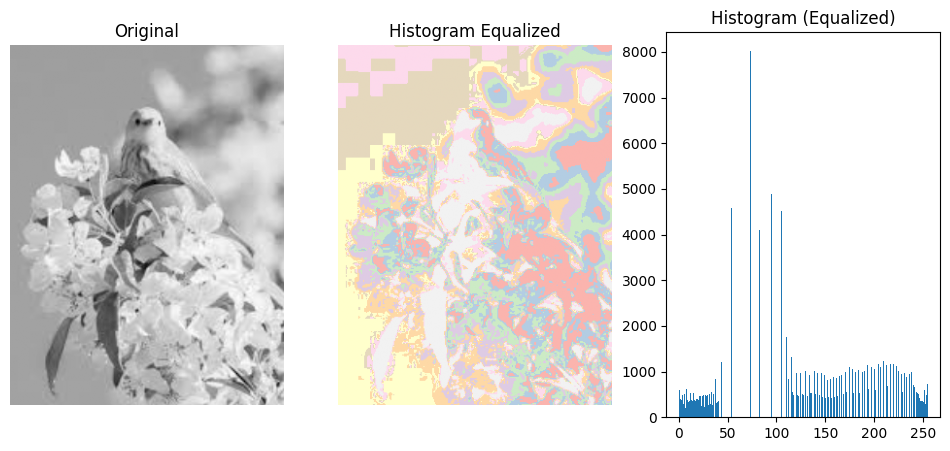

In [ ]:
#image enhancement
#point processing
#histogram
import cv2
import matplotlib.pyplot as plt

img=cv2.imread("/content/bird2.png",0)

he_img = cv2.equalizeHist(img)

plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Histogram Equalized")
plt.imshow(he_img, cmap='Pastel1_r')
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Histogram (Equalized)")
plt.hist(he_img.ravel(),250)
plt.show()

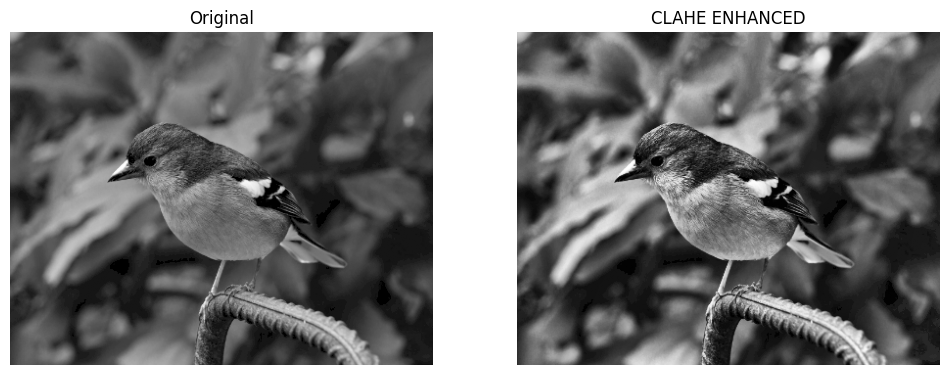

In [ ]:
#Point Processing
#CLAHE
import cv2
import matplotlib.pyplot as plt

#load image
img=cv2.imread("/content/bird1.png",0)
clahe=cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
clahe_img=clahe.apply(img)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.subplot(1,2,2)
plt.title("CLAHE ENHANCED")
plt.imshow(clahe_img, cmap='gray')
plt.axis("off")
plt.show()

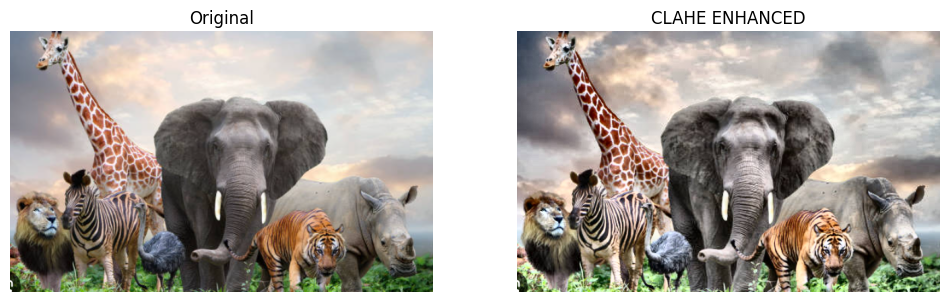

In [ ]:
#point porcessing
#Colour Enhancement
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("/content/animals.png")
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
Y, Cr, Cb = cv2.split(img_ycrcb)
clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8,8))
Y_chahe= clahe.apply(Y)
img_ycrcb_chahe = cv2.merge([Y_chahe, Cr, Cb])
img_bgr_chahe = cv2.cvtColor(img_ycrcb_chahe, cv2.COLOR_YCR_CB2BGR)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1,2,2)
plt.title("CLAHE ENHANCED")
plt.imshow(cv2.cvtColor(img_bgr_chahe, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


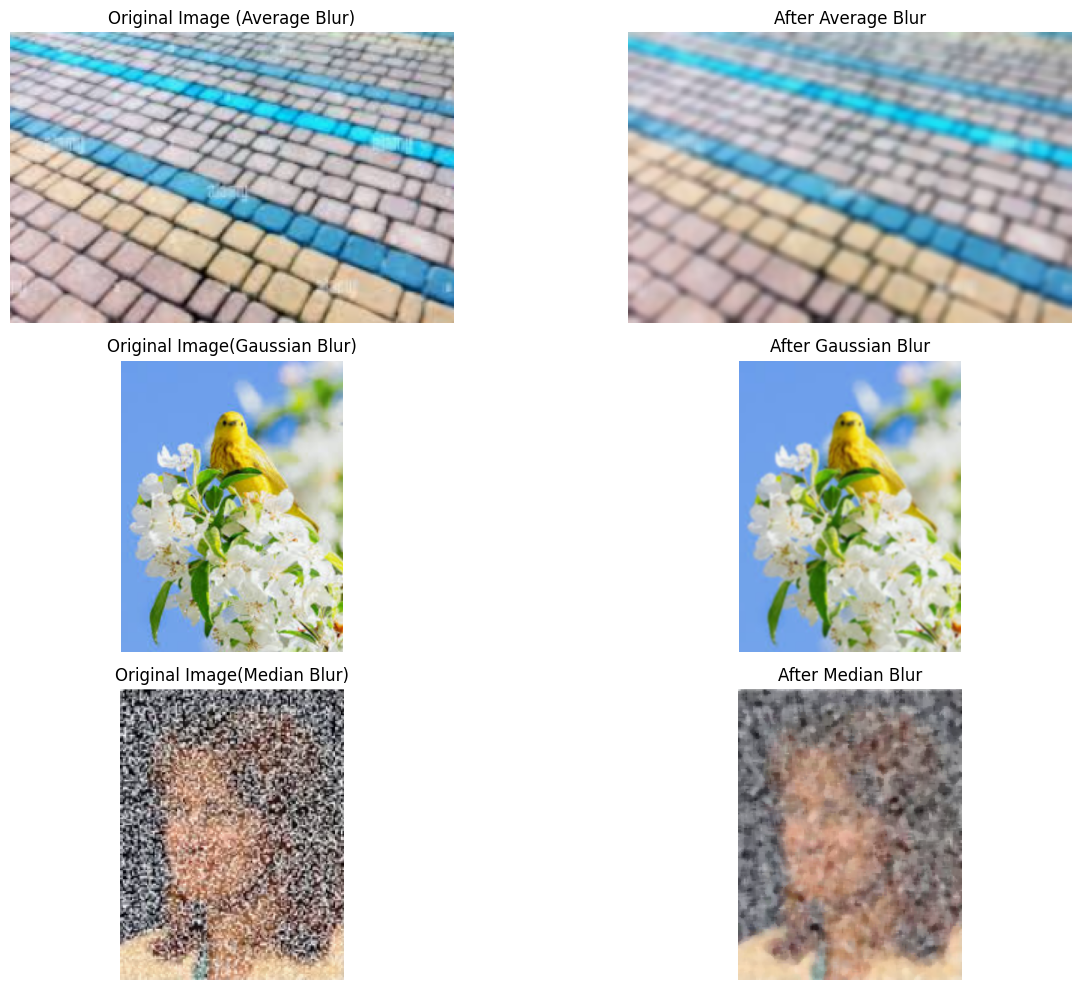

In [ ]:
#Spatial Domain Filtering - Smoothing

import cv2
import matplotlib.pyplot as plt

#Load 3 different images
img_avg = cv2.imread("/content/tiles.png")
img_gauss = cv2.imread("/content/bird2.png")
img_median = cv2.imread("/content/medianblur.png")

#Check loading
if img_avg is None or img_gauss is None or img_median is None:
  print("Error: One or more images not found. Check file paths!")
  exit()

#Convert BGR -> RGB for correct display
img_avg_rgb = cv2.cvtColor(img_avg, cv2.COLOR_BGR2RGB)
img_gauss_rgb = cv2.cvtColor(img_gauss, cv2.COLOR_BGR2RGB)
img_median_rgb = cv2.cvtColor(img_median, cv2.COLOR_BGR2RGB)

#Apply filters

#1.Average Smoothing
avg_blur = cv2.blur(img_avg, (5,5))
avg_blur_rgb = cv2.cvtColor(avg_blur, cv2.COLOR_BGR2RGB)

#2.Gaussian Smoothing
gaussian_blur = cv2.GaussianBlur(img_gauss, (5,5), 0)
gaussian_blur_rgb = cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB)

#3.Median Smoothing
median_blur = cv2.medianBlur(img_median, 5)
median_blur_rgb = cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB)

#Display Before and After for each filter
plt.figure(figsize=(14,10))

#Average Blur
plt.subplot(3,2,1)
plt.imshow(img_avg_rgb)
plt.title("Original Image (Average Blur)")
plt.axis("off")
plt.subplot(3,2,2)
plt.imshow(avg_blur_rgb)
plt.title("After Average Blur")
plt.axis("off")

#Gaussian Blur
plt.subplot(3,2,3)
plt.imshow(img_gauss_rgb)
plt.title("Original Image(Gaussian Blur)")
plt.axis("off")
plt.subplot(3,2,4)
plt.imshow(gaussian_blur_rgb)
plt.title("After Gaussian Blur")
plt.axis("off")

#Median Blur
plt.subplot(3,2,5)
plt.imshow(img_median_rgb)
plt.title("Original Image(Median Blur)")
plt.axis("off")
plt.subplot(3,2,6)
plt.imshow(median_blur_rgb)
plt.title("After Median Blur")
plt.axis("off")

plt.tight_layout()
plt.show()

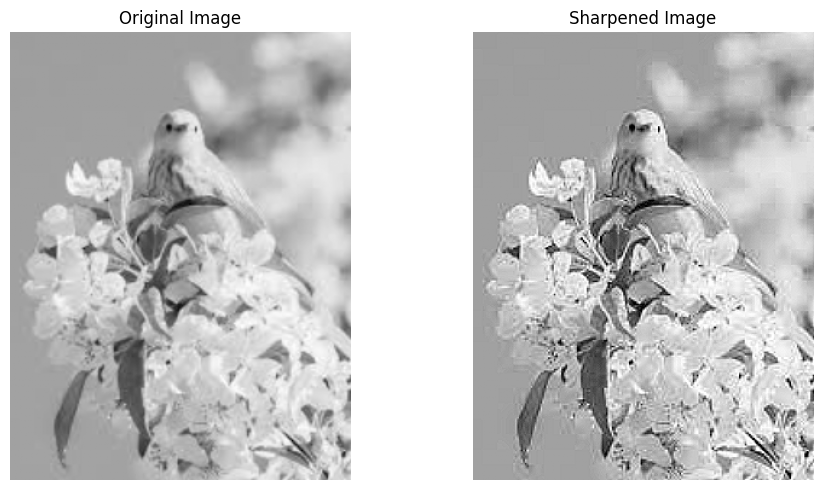

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#Load image in grayscale
img = cv2.imread("/content/bird2.png",0)

#Sharpening kernel(simple 3x3 filter)
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

#Apply Sharpening
sharpened = cv2.filter2D(img, -1, kernel)

#Show original and sharpened images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(sharpened,cmap = 'gray')
plt.title("Sharpened Image")
plt.axis("off")

plt.tight_layout()
plt.show()

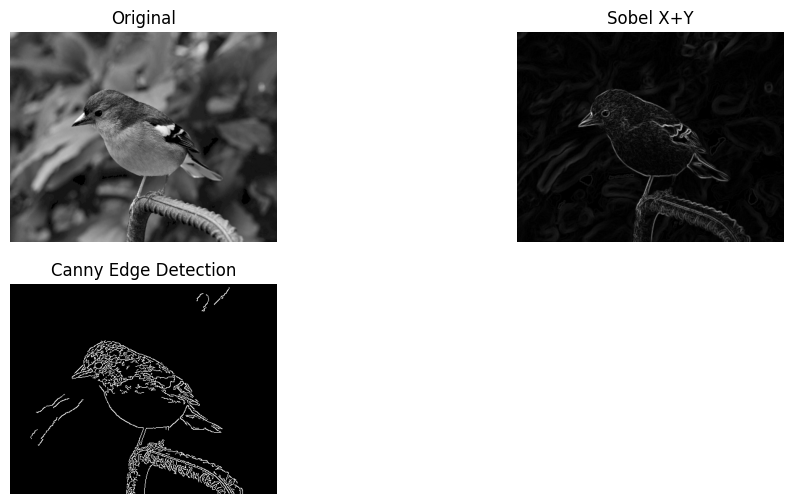

In [ ]:
#Spacial domain filtering
#Edge detection
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/bird1.png",0)

#sobel edge detector
sobel_x =cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobel_y =cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobel_xy = cv2.magnitude(sobel_x,sobel_y)

#canny edge detector
canny_edges = cv2.Canny(img,100,200)
#display
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis("off")

plt.subplot(2,2,2)
plt.title("Sobel X+Y")
plt.imshow(sobel_xy, cmap='gray')
plt.axis("off")

plt.subplot(2,2,3)
plt.title("Canny Edge Detection")
plt.imshow(canny_edges, cmap='gray')
plt.axis("off")

plt.show()


Optimal Threshold Value: 116.0


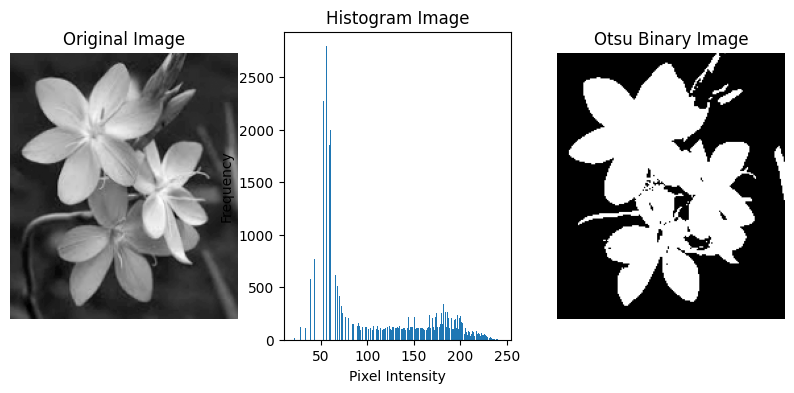

In [2]:
#image segmentation
import cv2
import numpy as np
import matplotlib.pyplot as plt

#load grayscale image
img = cv2.imread("/content/Screenshot 2025-12-20 130905.png",0)
if img is None:
  raise ValueError("Image not found")

#Apply otsu's Binarization
#threshold value is automatically claculated
#threshold(src,thresh,maxval,type)
threshold_value,binary_img = cv2.threshold(
    img,
    100,
    255,
    cv2.THRESH_BINARY+cv2.THRESH_OTSU #for using otsu
    #cv2.thresh_binary
    #cv2.thresh_binary_inv
)
print("Optimal Threshold Value:",threshold_value)
#display result

plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Histogram Image")
plt.hist(img.ravel(),256)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(1,3,3)
plt.title("Otsu Binary Image")
plt.imshow(binary_img, cmap='gray')
plt.axis("off")

plt.show()
